<a href="https://colab.research.google.com/github/RainXie23/MANE4961---Machine-Learning-for-Engineering-Fall-2025-/blob/main/InClass19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Combine the train and test sets in the Fashion MNIST dataset (70,000 images). Use 200
decision trees to construct a random forest classifier and calculate the importance of each feature
in the normalized combined dataset and create a plot demonstrating the feature importance for all
784 pixels.

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

# Define a transform to normalize the data and convert it to a tensor
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)) # Normalize to [-1, 1] range
])

# Download and load the training data
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                                download=True, transform=transform)

# Download and load the test data
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                               download=True, transform=transform)

# Create data loaders
batch_size = 64 # You can adjust this batch size
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                            shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                           shuffle=False, num_workers=2)

print(f"Training dataset size: {len(train_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")

100%|██████████| 26.4M/26.4M [00:02<00:00, 10.5MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 200kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.74MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 20.3MB/s]

Training dataset size: 60000
Test dataset size: 10000


In [2]:
import numpy as np

x = np.array(train_dataset.data)
y = np.array(train_dataset.targets) # Also get the labels for the training set

# Concatenate the training and test images
x_combined = np.concatenate((x, np.array(test_dataset.data)), axis=0)

# Concatenate the training and test labels
y_combined = np.concatenate((y, np.array(test_dataset.targets)), axis=0)

print(f"Combined images shape: {x_combined.shape}")
print(f"Combined labels shape: {y_combined.shape}")

Combined images shape: (70000, 28, 28)
Combined labels shape: (70000,)


In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_combined, y_combined, test_size=0.2, random_state=42, shuffle = True, stratify = y_combined)

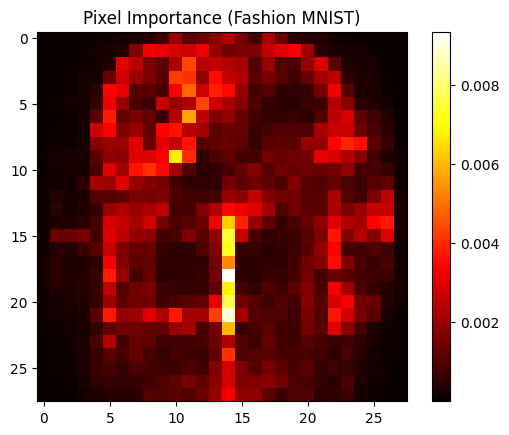

In [6]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Reshape the 3D image data into 2D (samples, features)
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

rf_clf = RandomForestClassifier(n_estimators=200, random_state=0, n_jobs=-1) # Use n_estimators=200 and all available cores
rf_clf.fit(x_train_flat, y_train)

importances = rf_clf.feature_importances_.reshape(28,28)

plt.imshow(importances, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title("Pixel Importance (Fashion MNIST)")
plt.show()